In [2]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np

def imshow(img):
    plt.axis('off')
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

Crop the image by its largest contour

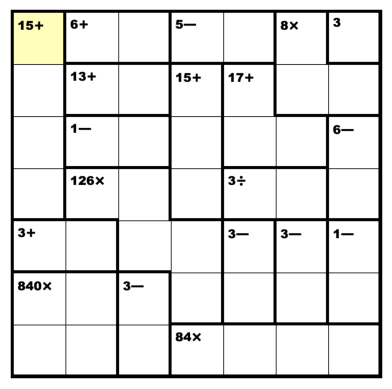

In [73]:
# Read the input image and perform cropping
img = cv2.imread('kenken.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (41, 41), 0)
ret,thresh = cv2.threshold(blur,150,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

outer_border = contours[1]
x, y, w, h = cv2.boundingRect(outer_border)
img = img[y:y+h, x:x+w]

imshow(img)

Find all the blocks in the image

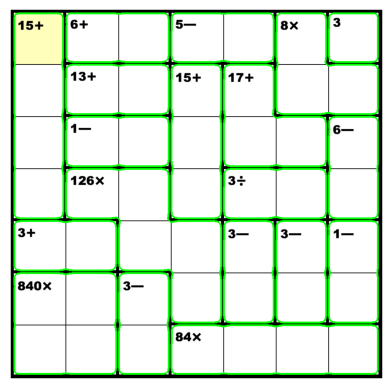

In [76]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (41, 41), 0)
ret,thresh = cv2.threshold(blur,150,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# get dark-squared contours
filtered = []
for contour in contours:
    epsilon = 0.01*cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,epsilon, True)
    if len(approx) >= 4:
        x, y, w, h = cv2.boundingRect(contour)
        if min(w, h) > len(img) / 10:       # assures that no numbered contours are interpreted
            filtered.append(contour)

# draw the contour on the input image
newimg = cv2.drawContours(img.copy(), filtered, -1, (0,255,0), 3)

# display the image with drawn contours and approximate contours
imshow(newimg)